In [1]:
import tensorflow as tf 
import seaborn as sns 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2 
import os

from mtcnn_cv2 import MTCNN

In [2]:
# Chargement du modèle entraîné
model = tf.keras.models.load_model('emotion_model')

In [3]:
# Création de l'instance de mtcnn pour la détection des visages
face_detector = MTCNN()

In [4]:
# On définit tous les labels 
all_labels = {0: "angry", 1:"disgust", 2:"fear", 3:"happy", 4:"neutral", 5:"sad", 6:"surprise"}

In [5]:
# Fonction pour localiser le visage
def face_detection(file):
    img = cv2.imread(f"test_images/{file}", 3)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (100,100))
    rois = face_detector.detect_faces(img)
    localized = []
    boxes = []
    for roi in rois: # Itérations pour chaque visage detecté
        x, y, w, h = roi['box'] # Récupération des coordonnées
        crop = img[y-12:y+h+12, x-12:x+w+12] # Rognage autour de la box avec une marge de 12px
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY) # Passage en gris/blanc
        resized = (cv2.resize(gray,(48,48)).astype('float') / 255).reshape(1,48,48,1) # Redimension
        localized.append(resized)
        boxes.append([x, y, w, h])
    return img, localized, boxes

In [6]:
# Fonction pour la reconnaissance de l'émotion
def emotion_detection(image, faces, boxes):
    emotions=[]
    for i in range(len(faces)) : # Itérations pour chaque box/visage
        emotion = np.argmax(model.predict(faces[i])) # Reconnaissance de l'émotion
        x, y, w, h = boxes[i] # Coordonnées pour tracer le cadre
        image = cv2.rectangle(image,(x-10,y-10),(x+w+10,y+h+10),(255,255,0),2) # Traçage du rectangle
        plt.text(x+2, y-16, all_labels[emotion], color="#00ff55", fontsize=14) # Annotations sur l'image
        emotions.append(all_labels[emotion])
    return image

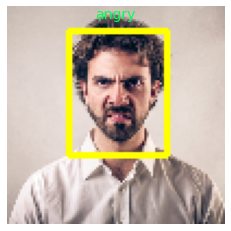

In [7]:
# Angry
image, localized_faces, boxes = face_detection("angry.jpg")
final_img = emotion_detection(image, localized_faces, boxes)
plt.axis('off')
plt.imshow(final_img)

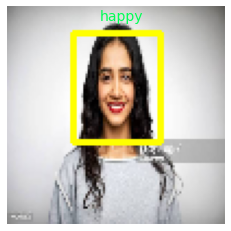

In [8]:
# Happy
image, localized_faces, boxes = face_detection("happy.jpg")
final_img = emotion_detection(image, localized_faces, boxes)
plt.axis('off')
plt.imshow(final_img)

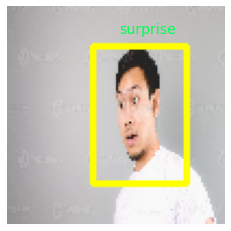

In [9]:
# Surprise
image, localized_faces, boxes = face_detection("surprise.jpg")
final_img = emotion_detection(image, localized_faces, boxes)
plt.axis('off')
plt.imshow(final_img)